## Analytic Report project

### Import

In [89]:
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

## Load Data

In [90]:
df = pd.read_excel("Cardiology.xls", skiprows=[1, 2])
df.head()

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
0,60,1,4,130,206,0,2,132,1,2.4,2,2,7,0
1,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
2,64,1,1,110,211,0,2,144,1,1.8,2,0,3,1
3,63,1,4,130,254,0,2,147,0,1.4,2,1,7,0
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0


In [91]:
df.shape

(303, 14)

In [105]:
#df.describe()

## 1.	How does blood pressure and cholesterol relate to each other?

In [106]:
print("Mức độ kiểm định tương quan giữa blood pressure và cholesterol: %.7f" %(df["blood pressure"].corr(df["cholesterol"])))

Mức độ kiểm định tương quan giữa blood pressure và cholesterol: 0.1231742


** Nhận xét: **    

Hệ số kiểm định tương quan giữa hai cột xấp xỉ 0.123 (quá bé so vs 1). 

Do đó ta kết luận blood pressure và cholesterol không tương quan với nhau.

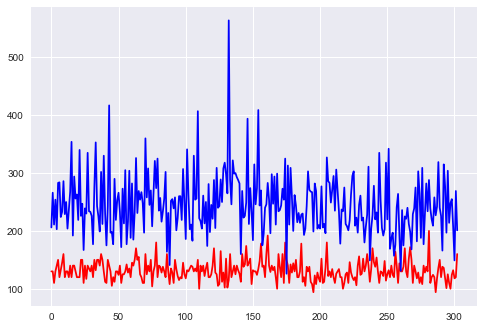

In [94]:
N = df.shape[0]
a = df["blood pressure"]
b = df["cholesterol"]

plt.plot(a, "red")
plt.plot(b, "blue")
plt.show()

## 2.	Do men tend to have higher blood pressure than women? What about cholesterol?

### 2.1 Blood pressure:
* ***Null hypothesis:*** Đàn ông có huyết áp cao hơn.
* ***Alternative hypothesis:*** Phụ nữ có huyết áp cao hơn.

In [95]:
male = df[df['sex']== 1]
female = df[df['sex']== 0]

ttest_ind(male['blood pressure'], female['blood pressure'])

Ttest_indResult(statistic=-0.98649315362083601, pvalue=0.3246834797221041)

**Giá trị p-value **$\approx  0.325 > 0.10$.

Do đó, không có minh chứng để bác bỏ null-hypothesis. Do đó đàn ông thì thường có huyết áp cao hơn. 

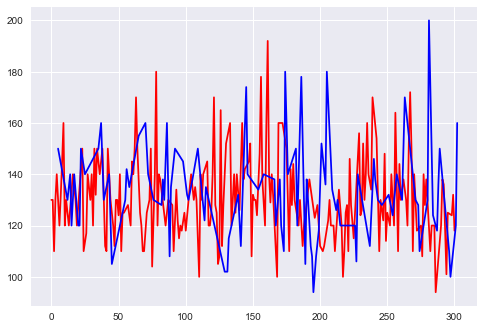

In [96]:
male = df[df['sex']== 1]
female = df[df['sex']== 0]

plt.plot(male["blood pressure"], "red")
plt.plot(female["blood pressure"], "blue")
plt.show()

### 2.2 Cholesterol:
* ***Null hypothesis:*** Đàn ông có cholesterol cao hơn.
* ***Alternative hypothesis:*** Phụ nữ có cholesterol cao hơn.

In [97]:
male = df[df['sex']== 1]
female = df[df['sex']== 0]

ttest_ind(male['cholesterol'], female['cholesterol'])

Ttest_indResult(statistic=-3.5029368327219244, pvalue=0.00052996661062266396)

**Giá trị p-value **$\approx  0.0005 < 0.01 \ \ \ \Rightarrow $ ***null-hypothesis*** bị bác bỏ. 

Do đó phụ nữ thì thường có huyết áp cao hơn.

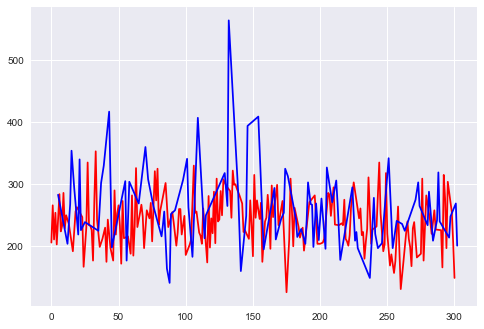

In [98]:
male = df[df['sex']== 1]
female = df[df['sex']== 0]

plt.plot(male["cholesterol"], "red")
plt.plot(female["cholesterol"], "blue")
plt.show()

## 3.	What contribute to causing heart disease (age, cholesterol, blood pressure)?  Is it the effect the same for both sex (male and female)?

### 3.1 Age cause heart disease?

* **Null hypothesis: ** Age cause heart disease.
* **Alternative hypothesis: ** Age don't cause heart disease.

In [99]:
heart_disease = df['age'][df['class']== 1]       # Null hypothesis
non_heart_disease = df['age'][df['class']== 0]   # Alternative hypothesis

ttest_ind(heart_disease, non_heart_disease)

Ttest_indResult(statistic=-4.014560975148874, pvalue=7.5248013034423728e-05)

$p-value \approx 7.52 > 0.10  \Rightarrow \ \ \ $ không đủ điều kiện bác bỏ null hypothesis.

**Kết luận: ** Tuổi tác ảnh hưởng đến bệnh tim.

### So sánh ảnh hưởng của tuổi đối với nam và nữ

In [100]:
# For male:
male_heart_disease = df['age'][df['sex']==1][df['class']== 1]       # Null hypothesis
male_non_heart_disease = df['age'][df['sex']==1][df['class']== 0]   # Alternative hypothesis

stat, p_value = ttest_ind(male_heart_disease, male_non_heart_disease)
print("For male, age cause heart disease?")
print('      p-value = %.7f' %(p_value))

# For female:
# For male:
male_heart_disease = df['age'][df['sex']==0][df['class']== 1]       # Null hypothesis
male_non_heart_disease = df['age'][df['sex']==0][df['class']== 0]   # Alternative hypothesis

stat, p_value = ttest_ind(male_heart_disease, male_non_heart_disease)
print("For female, age cause heart disease?")
print('      p-value = %.7f' %(p_value))

For male, age cause heart disease?
      p-value = 0.0000210
For female, age cause heart disease?
      p-value = 0.0424696


**Nhận xét: ** 

* Với nam, ${pvalue}_{ nam} \approx 0.0000210 \ \ \ < 0.01 \ \ \ \Rightarrow$. không thể bác bỏ giả thuyết tuổi tác gây bệnh tim mạch cho nam giới.
* Với nữ, ${pvalue}_{ nữ} \approx 0.0424696  \ \ \ (0.01 < {p-value}_{ nữ} \le 0.05)$. khả năng bác bỏ giả thuyết tuổi tác gây bệnh tim mạch cho nữ giới tương đối cao.

**Kết luận: ** Như vậy, tuổi tác dễ gây bệnh tim mạch đến nam nhiều hơn.

### 3.2 Cholesterol cause heart disease?

* **Null hypothesis: ** Cholesterol cause heart disease.
* **Alternative hypothesis: ** Cholesterol don't cause heart disease.

In [101]:
heart_disease = df['cholesterol'][df['class']== 1]         # Null hypothesis
non_heart_disease = df['cholesterol'][df['class']== 0]     # Alternative hypothesis

ttest_ind(heart_disease, non_heart_disease)

Ttest_indResult(statistic=-1.4842450762526977, pvalue=0.13879032695600638)

$pvalue \approx 0.14 > 0.10  \Rightarrow \ \ \ $ không đủ điều kiện bác bỏ null hypothesis.

**Kết luận: **Cholesterol ảnh hưởng đến bệnh tim.

### So sánh ảnh hưởng của cholesterol đối với nam và nữ

In [102]:
# For male:
male_heart_disease = df['cholesterol'][df['sex']==1][df['class']== 1]       # Null hypothesis
male_non_heart_disease = df['cholesterol'][df['sex']==1][df['class']== 0]   # Alternative hypothesis

stat, p_value = ttest_ind(male_heart_disease, male_non_heart_disease)
print("For male, cholesterol cause heart disease?")
print('      p-value = %.7f' %(p_value))

# For female:
# For male:
male_heart_disease = df['cholesterol'][df['sex']==0][df['class']== 1]       # Null hypothesis
male_non_heart_disease = df['cholesterol'][df['sex']==0][df['class']== 0]   # Alternative hypothesis

stat, p_value = ttest_ind(male_heart_disease, male_non_heart_disease)
print("For female, cholesterol cause heart disease?")
print('      p-value = %.7f' %(p_value))

For male, cholesterol cause heart disease?
      p-value = 0.0113481
For female, cholesterol cause heart disease?
      p-value = 0.2372595


**Nhận xét: ** 

* Với nam, ${pvalue}_{nam} \approx 0.0113 \ \ \ \ (0.01 < {pvalue}_{nam} \le 0.05) \ \ \ \Rightarrow$. khả năng bác bỏ giả thuyết cholesterol gây bệnh tim mạch cho nam giới khá cao.
* Với nữ, ${pvalue}_{nữ} \approx 0.2373  > 0.10$. không thể bác bỏ giả thuyết cholesterol gây bệnh tim mạch cho nữ giới.

**Kết luận: ** Như vậy, cholesterol chỉ ảnh hưởng đến nữ mà không ảnh hưởng đến nam.

### 3.3 Blood pressure cause heart disease?

* **Null hypothesis: **  Blood pressure cause heart disease.
* **Alternative hypothesis: **  Blood pressure don't cause heart disease.

In [103]:
heart_disease = df['blood pressure'][df['class']== 1]         # Null hypothesis
non_heart_disease = df['blood pressure'][df['class']== 0]     # Alternative hypothesis

ttest_ind(heart_disease, non_heart_disease)

Ttest_indResult(statistic=-2.5412927171039001, pvalue=0.011546059200233312)

$pvalue \approx 0.0115  \ \ \ (0.01 < pvalue < 0.05) \Rightarrow \ \ \ $ khả năng bác bỏ null hypothesis tương đối cao.

**Kết luận: ** Huyết áp không ảnh hưởng đến bệnh tim.

### So sánh ảnh hưởng của huyết áp đối với nam và nữ

In [104]:
# For male:
male_heart_disease = df['blood pressure'][df['sex']==1][df['class']== 1]       # Null hypothesis
male_non_heart_disease = df['blood pressure'][df['sex']==1][df['class']== 0]   # Alternative hypothesis

stat, p_value = ttest_ind(male_heart_disease, male_non_heart_disease)
print("For male, blood pressure cause heart disease?")
print('      p-value = %.7f' %(p_value))

# For female:
male_heart_disease = df['blood pressure'][df['sex']==0][df['class']== 1]       # Null hypothesis
male_non_heart_disease = df['blood pressure'][df['sex']==0][df['class']== 0]   # Alternative hypothesis

stat, p_value = ttest_ind(male_heart_disease, male_non_heart_disease)
print("For female, blood pressure cause heart disease?")
print('      p-value = %.7f' %(p_value))

For male, blood pressure cause heart disease?
      p-value = 0.3484860
For female, blood pressure cause heart disease?
      p-value = 0.0000784


**Nhận xét: ** 

* Với nam, ${pvalue}_{nam} \approx 0.3484860 > 0.10 \ \ \ $. không thể bác bỏ giả thuyết huyết áp gây bệnh tim mạch cho nam giới.
* Với nữ, ${pvalue}_{nữ} \approx 0.0000784  < 0.01  \ \ \ $. bác bỏ giả thuyết huyết áp gây bệnh tim mạch cho phái nữ.

**Kết luận: ** Như vậy, huyết áp không ảnh hưởng đến nữ giới, mà chỉ ảnh hưởng đến nam giới.